# Anomaly Detection

In statistics, an outlier is a data point that differs significantly from other observations, in other words an **Anomaly**.

![Outlier](images\outlier.png)


## Approach 
### Non-Parametric: 
- We make no assumptions regarding the distribution of the data. 
- Data can be represented by the median
### Parametric: 
- We make certain assumptions regarding the districution of the data.
- These assumptions can facilitate better results  

## The Dataset
Requests for NWT in English from United States printed in North America.
Columns:
- Date 
- Requets 
- Language
- Publication
- Geo Name 

## Non-Parametric
### Inter quartile Range (IQR)

![Boxplot](images/Boxplot.png)

- **Min**: the lowest data point in the distribution excluding any outliers.
- **Max**: the highest data point in the distribution excluding any outliers.
- **Median (Q2 / 50th percentile)** : the middle value of the dataset.
- **First quartile (Q1 / 25th percentile)** : is the median of the lower half of the dataset.
- **Thirds quartile (Q3 / 75th percentile)** : is the median of the upper half of the dataset.

![Boxplot](images/median.png)

The Interquartile Range (IQR) helps to define outliers:

```python
IQR = Q3-Q1
```
It is an outlier if:
- Below (Q1 − 1.5 * IQR) of the boxplot lower whisker.
- Above (Q3 + 1.5 * IQR) of the boxplot upper whisker.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [25]:
data = pd.read_csv('data/owid-covid-data.csv')
is_usa = data.iso_code == 'USA'
data = data[is_usa]
data = data[["date", "new_cases", "new_deaths"]]
data.set_index("date", inplace = True)
data = data.dropna()
data.head()

,new_cases,new_deaths
date,,
2/29/2020,8.0,1.0
3/1/2020,7.0,0.0
3/2/2020,23.0,5.0
3/3/2020,19.0,1.0
3/4/2020,33.0,4.0


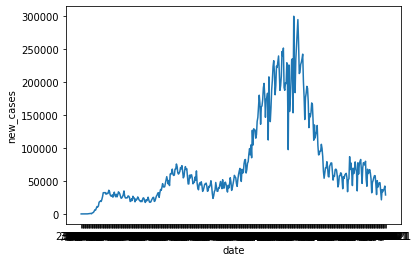

In [29]:
sns.lineplot(data=data, x="date", y="new_cases")
plt.show()

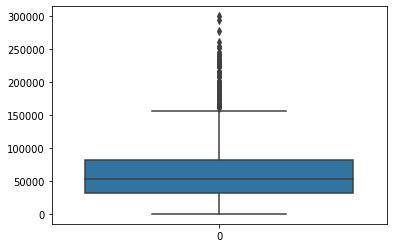

In [30]:
sns.boxplot(data = data['new_cases'])
plt.show()

### The Tuckey method for outlier detection
A non-visual method of the box plot.

1. Obtains:
 - The 1st Quartile
 - The 3rd Quartile
 - The IQR
2. Defines upper and lower fences
3. It detects outliers by:
 - Observed point is < lower fence
 - Observed point is > upper fence

In [31]:
Q1 = np.percentile(data['new_cases'], 25)
Q3 = np.percentile(data['new_cases'], 75)
        
IQR = Q3 - Q1

multiplier = 1.5

lower_fence = Q1 - (multiplier * IQR)
upper_fence = Q3 + (multiplier * IQR)

outliers = data[(data['new_cases'] < lower_fence) | (data['new_cases'] > upper_fence)]
outliers

,new_cases,new_deaths
date,,
11/12/2020,164839.0,1204.0
11/13/2020,180389.0,1200.0
11/14/2020,167761.0,1347.0
11/16/2020,162945.0,829.0
11/17/2020,163922.0,1721.0
...,...,...
1/21/2021,193818.0,4205.0
1/22/2021,190753.0,3845.0
1/23/2021,170613.0,3345.0


### Highlight outliers
Overlay time series data with outliers 

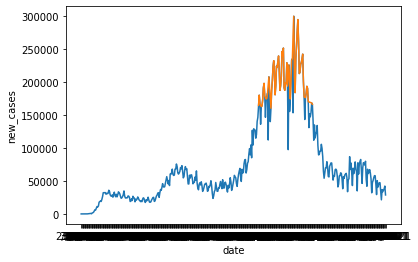

In [34]:
sns.lineplot(data=data, x="date", y="new_cases")
sns.lineplot(data=outliers, x="date", y="new_cases")
plt.show()

### Percentile function in C&#35

```csharp
public double Percentile(double[] sequence, double percentile)
{
    Array.Sort(sequence);
    int N = sequence.Length;
    double n = (N - 1) * percentile + 1;
    
    if (n == 1d) return sequence[0];
    else if (n == N) return sequence[N - 1];
    else
    {
         int k = (int)n;
         double d = n - k;
         return sequence[k - 1] + d * (sequence[k] - sequence[k - 1]);
    }
}
```
Reference:
- https://en.wikipedia.org/wiki/Percentile
- https://stackoverflow.com/questions/8137391/percentile-calculation
